<a href="https://colab.research.google.com/github/Gayatri200805/Database-Management-Project/blob/main/medical_insurance_linear_regression_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub


In [2]:
import kagglehub
path = kagglehub.dataset_download("mirichoi0218/insurance")


Using Colab cache for faster access to the 'insurance' dataset.


In [3]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance


In [4]:
import pandas as pd
import numpy as np

In [5]:
import os

path = "/kaggle/input/insurance"
print("Files inside the folder:")
print(os.listdir(path))


Files inside the folder:
['insurance.csv']


In [6]:
medical_df = pd.read_csv(path + '/insurance.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#ditribution of age
fig = px.histogram(medical_df, x = 'age', marginal='box',nbins=47,title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

In [13]:
#distribution of bodymass index
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal='box',
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()


<Axes: xlabel='charges', ylabel='Count'>

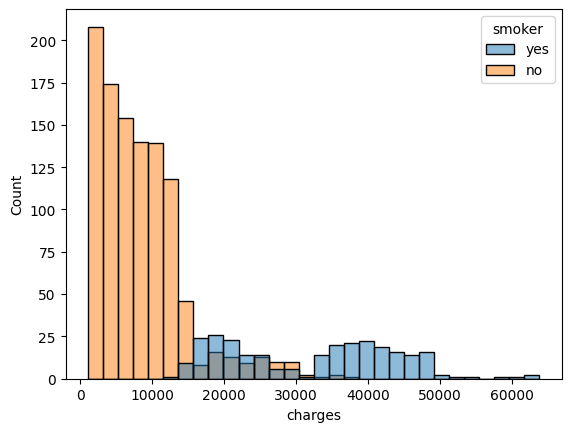

In [14]:
sns.histplot(medical_df, x='charges',hue='smoker')

In [15]:
fig = px.histogram(medical_df,
             x='charges',

             title = 'Annual charges',
             color='smoker')
fig.update_layout(bargap=0.05)
fig.show()

In [16]:
px.histogram(medical_df, x='smoker',color='sex')

In [17]:
px.scatter(medical_df,
           x ='age',
           y = 'charges',
           color='smoker',
           title = 'Age VS charges')

In [18]:
px.scatter(medical_df,
           x = 'bmi',
           y ='charges',
           color = 'smoker',
           title = 'BMI VS charges')

In [19]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [20]:
medical_df.bmi.corr(medical_df.charges)

np.float64(0.19834096883362895)

In [21]:
#finding the correlation between charges and smoker , correction is used for numerical columns
smoker_val = {'no':0,'yes':1}
smoker_num = medical_df.smoker.map(smoker_val)
medical_df.charges.corr(smoker_num)

np.float64(0.787251430498478)

suggest the strongest relation between charges and smoker


**Linear Regression using a Single Feature**



In [22]:
#estimating the value of "charges" using the value of "age" for non-smokers
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [23]:
px.scatter(non_smoker_df,x='age',y='charges')

In [24]:
#linear regression model
def estimate_charges(age, w, b):
  return w * age + b

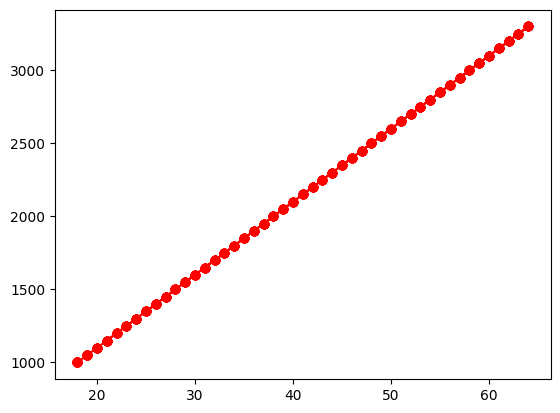

In [25]:
w = 50
b = 100
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
plt.plot(ages,estimated_charges, 'r-o')

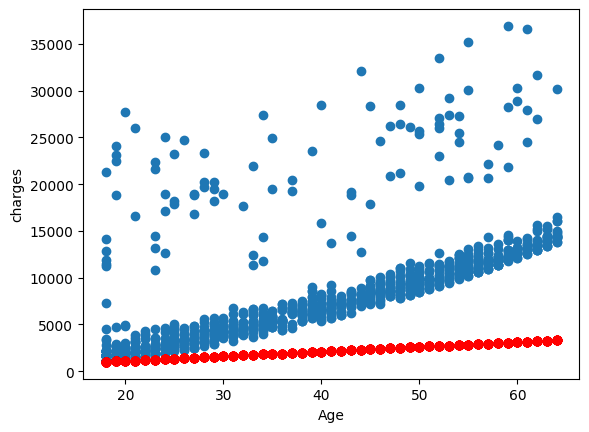

In [26]:
#overlay this line on the actual data, so see how well our model fits the data.
target = non_smoker_df.charges
plt.plot(ages,estimated_charges, 'r-o')
plt.scatter(ages,target)
plt.xlabel('Age');
plt.ylabel("charges");

In [27]:
#define a helper function try_parameters which takes w and b as inputs and creates the above plot
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
  plt.scatter(ages,target,s=6)
  plt.xlabel('Age');
  plt.ylabel("charges");

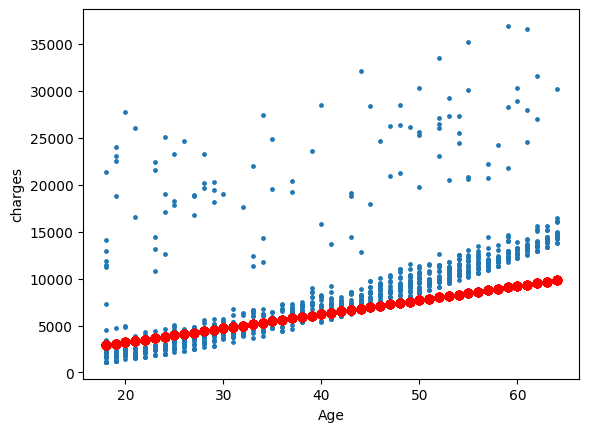

In [28]:
try_parameters(150,200)

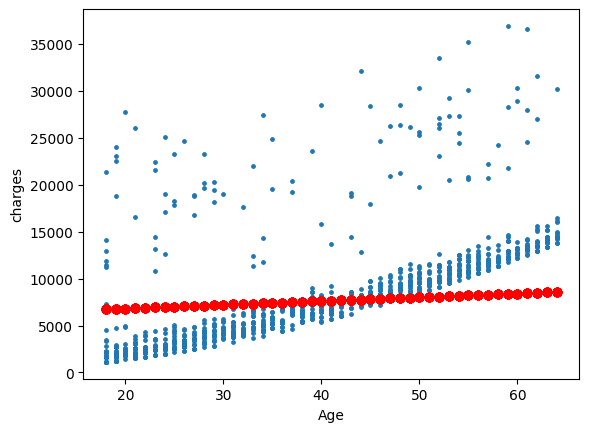

In [29]:
try_parameters(40, 6000)

**Loss/Cost Function**


In [30]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [31]:
w = 50
b = 100
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

np.float64(8461.949562575493)

In [32]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
# modify the try_parameters functions to also display the loss.
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(targets, predictions)
    print("RMSE LOSS:" ,loss)

RMSE LOSS: 8461.949562575493


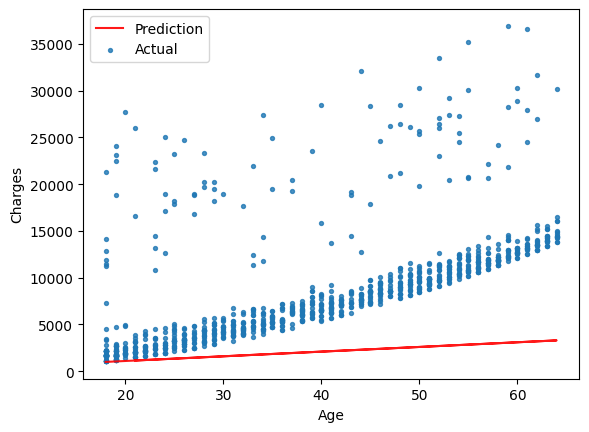

In [34]:
try_parameters(50, 100)

RMSE LOSS: 6096.521929033013


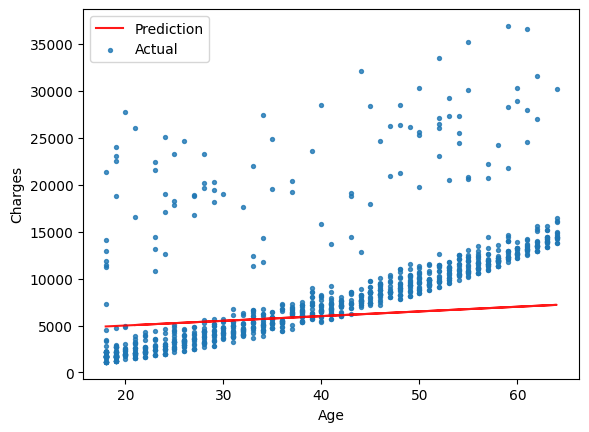

In [35]:
try_parameters(50, 4000)

**Linear Regression using Scikit-learn**


In [36]:
# use the LinearRegression class from scikit-learn to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique
from sklearn.linear_model import LinearRegression

In [37]:
# create a new model object.
model = LinearRegression()
model

LinearRegression()

In [38]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('Inputs.Shape:',inputs.shape)
print('Targets.Shape:',targets.shape)

Inputs.Shape: (1064, 1)
Targets.Shape: (1064,)


In [39]:
model.fit(inputs, targets)

LinearRegression()

In [40]:
model.predict(np.array([[23],
                       [50],
                       [60]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855, 11271.02508499, 13943.51421331])

In [41]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [42]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [43]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [44]:
#The parameters of the model are stored in the coef_ and intercept_ properties.
model.intercept_

np.float64(-2091.4205565650864)

In [45]:
model.coef_

array([267.24891283])

RMSE LOSS: 4662.505766636395


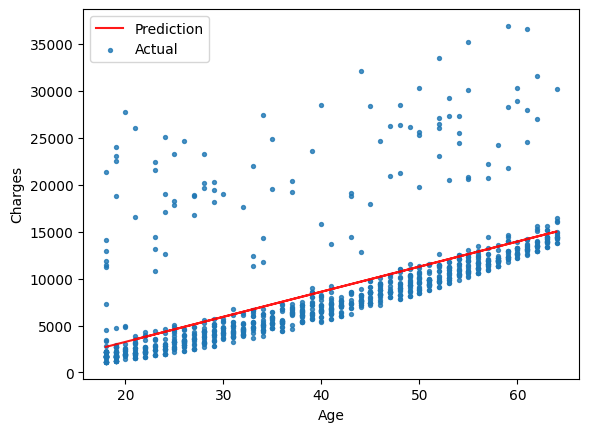

In [46]:
try_parameters(model.coef_, model.intercept_)

**Linear Regression using Multiple Features**


In [47]:
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  4608.470405038247


adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.


In [48]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [49]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

**Using Categorical Features for Machine Learning**


<Axes: xlabel='smoker', ylabel='charges'>

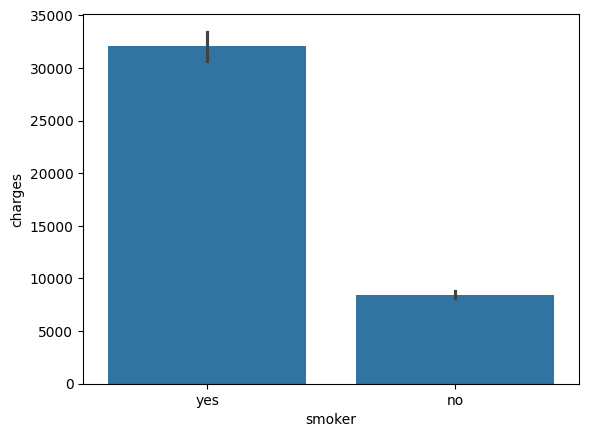

In [50]:
sns.barplot(data=medical_df, x='smoker',y ='charges')

In [51]:
smoker_codes = {'no':0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [52]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [53]:
# now use the smoker_df column for linear regression.
# create inputs and targets
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6056.439217188081


In [54]:
inputs, targets = medical_df[['age','bmi','children']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


The loss reduces from 11355 to 6056, almost by 50%!so we shouldn't ignore categorial data


<Axes: xlabel='sex', ylabel='charges'>

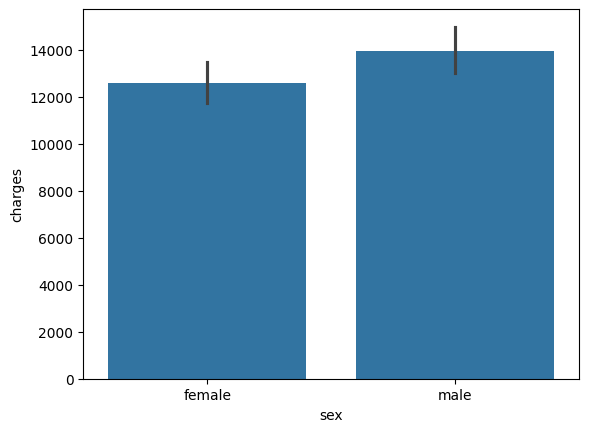

In [55]:
#adding the "sex" column as well.
sns.barplot(data= medical_df, x = 'sex',y ='charges')

In [56]:
sex_code = {'female': 0 , 'male': 1 }
medical_df['sex_code'] = medical_df.sex.map(sex_code)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [57]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [58]:
# create inputs and targets
inputs, targets = medical_df[['age','bmi','children','sex_code','smoker_code']], medical_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6056.100708754546


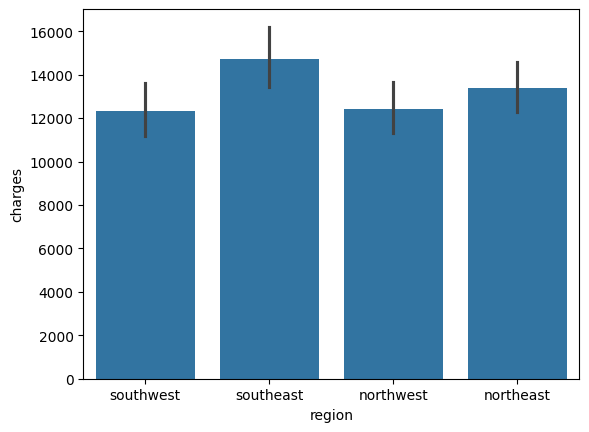

In [59]:
sns.barplot(data = medical_df, x = 'region', y = 'charges');

In [60]:
from sklearn import preprocessing
encode = preprocessing.OneHotEncoder()
encode.fit(medical_df[['region']])
encode.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [61]:
one_hot = encode.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [62]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [63]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [64]:
# create inputs and targets
inputs, targets = medical_df[['age','bmi','children','sex_code','smoker_code','northeast','northwest','southeast','southwest']], medical_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6041.6796511744515


In [65]:
from sklearn.ensemble import RandomForestRegressor
inputs, targets = medical_df[['age','bmi','children','sex_code','smoker_code','northeast','northwest','southeast','southwest']], medical_df['charges']

# create and train model
model_rf = RandomForestRegressor().fit(inputs, targets)

# Generate predictions
predictions = model_rf.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  1818.524925521058


In [66]:
model_rf.predict([[18,24,0,0,0,0,0,0,1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([1759.7860565])